In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
y = np.array([0.1, 0.5, 0.2, 0.8, 0.3, 0.2, 0.6, 0.9, 0.4, 0.9, 0.8, 0.9, 0.7, 0.7, 0.8, 0.9, 0.7,0.9, 0.8,1])

# np.random.seed(0)

# # Class 0 data points
# x0_x = np.random.normal(2, 1, 50)  # Center around x=2
# x0_y = np.random.normal(2, 1, 50)  # Center around y=2
# y0 = np.zeros(50)                  # Label them as class 0

# # Class 1 data points
# x1_x = np.random.normal(5, 1, 50)  # Center around x=5
# x1_y = np.random.normal(5, 1, 50)  # Center around y=5
# y1 = np.ones(50)                   # Label them as class 1

# # Combine all data
# x = np.concatenate((x0_x, x1_x))
# y = np.concatenate((y0, y1))


In [32]:
# Assign initial random values to parameters
theta0 = 0
theta1 = 0

# Set a learning rate
alpha = 0.1

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(theta0, theta1, x):
    z = theta0 + theta1 * x
    return sigmoid(z)

In [34]:
# Cell 5: init parameters
w = x  # weights (shape: n_features,)
b = 0.0                    # bias (scalar)

In [35]:
def cost_function(y_true, y_pred):
    m = len(y_true)
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # print((-1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
    return (-1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [36]:
def gradient_descent(x, y, theta0, theta1, alpha, epochs):
    m = len(x)
    for i in range(epochs):
        # Calculate predicted values
        y_pred = hypothesis(theta0, theta1, x)

        # Calculate the error
        error = y_pred - y

        # Update parameters
        theta0 = theta0 - alpha * (1/m) * np.sum(error)
        theta1 = theta1 - alpha * (1/m) * np.sum(error * x)
        
        # Calculate and print cost for monitoring
        cost = cost_function(y, y_pred)
        
        # print(f"Epoch {i+1}/{epochs}, Cost: {cost:.4f}, theta0: {theta0:.4f}, theta1: {theta1:.4f}")

    return theta0, theta1

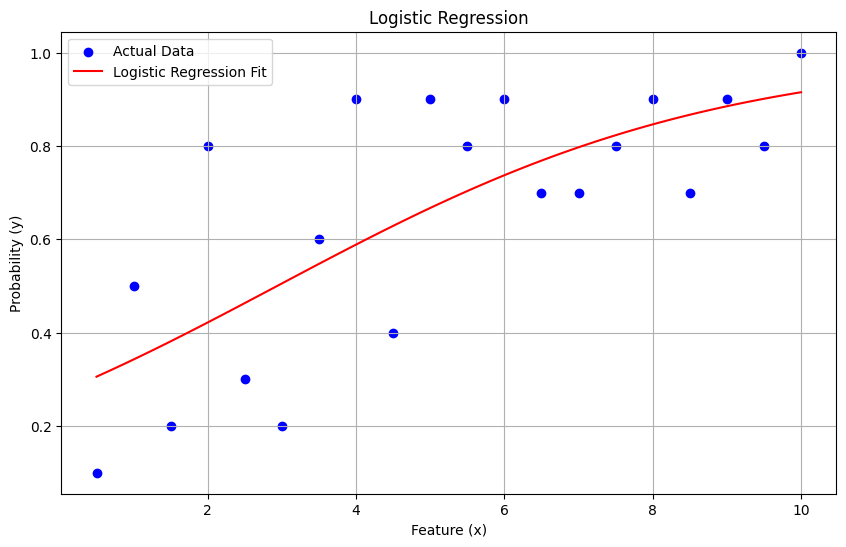

In [37]:
# Set the number of epochs
epochs = 5000

# Run gradient descent
final_theta0, final_theta1 = gradient_descent(x, y, theta0, theta1, alpha, epochs)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data')

x_values = np.linspace(min(x), max(x), 100)
y_values = predict(final_theta0, final_theta1, x_values)
plt.plot(x_values, y_values, color='red', label='Logistic Regression Fit')

plt.xlabel('Feature (x)')
plt.ylabel('Probability (y)')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
print("\nFinal Parameters:")
print(f"Theta0: {final_theta0:.4f}")
print(f"Theta1: {final_theta1:.4f}")


Final Parameters:
Theta0: -0.9882
Theta1: 0.3369
